In [4]:
import sys
import time
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

# Controleer de Python- en IPython-versie met asserts
# Asserts zijn handig: ingebouwde unit-testjes in Python!
assert sys.version_info.major == 3 and sys.version_info.minor >= 12, "Je hebt minimaal Python 3.12 nodig."
print(f"Python versie {'.'.join(map(str, sys.version_info[:3]))} is oke!")

import IPython
assert IPython.version_info[0] >= 7, "Je hebt IPython >= 7 nodig."
print(f"IPython versie {'.'.join(map(str, IPython.version_info[:3]))} is ook oke!")

print("Python en IPython lijken in orde.")

Python versie 3.12.3 is oke!
IPython versie 9.2.0 is ook oke!
Python en IPython lijken in orde.


Hopelijk is alles in orde en kunnen we doorgaan met de rest van de notebook.

We vergelijken drie methoden voor het bepalen van het maximum element in een array:
- De ingebouwde `max` functie.
- Onze eigen implementatie `my_max`.
- (Later: een alternatieve implementatie `max2`)

### Functies en Test

In [5]:
# Functie voor een numpy array met random integers (0 tot en met 99)
def random_int_array(length):
    return np.random.randint(0, high=100, size=length, dtype="l")

# Eigen implementatie: my_max (lineaire scan)
def my_max(int_array):
    result = int_array[0]
    for x in int_array:
        result = result if x <= result else x
    return result

# Test de functie
arr = random_int_array(5)
assert max(arr) == my_max(arr), "Implementatie klopt niet!"
print(f"max(arr): {max(arr)} == my_max(arr): {my_max(arr)}")

max(arr): 65 == my_max(arr): 65


### Runtime-metingen

In de vorige cell hebben we de implementatie van my_max met maar
één meting vergeleken met de standaard python max. Dat is alleen
natuurlijk niet echt een nette manier om runtime te meten.
Eigenlijk moeten we dit netjes systematisch aanpakken. Dat wil
zeggen:

- Meerdere metingen doen
- Voor meerdere inputgroottes (in dit geval de lengte van de array)
- En zowel het gemiddelde, als de standaardafwijking (=standaarddeviatie) bekijken

De standaardafwijking is hoeveel een meting gemiddeld van het
gemiddelde afwijkt. 

De onderstaande code maakt zo'n systematische vergelijking tussen de runtimes van de twee algoritmes. Let op dat:

- De twee functies worden vergeleken op verschillende groottes arrays (die in "meetpunten") staan. Specifiek: van 5 tot en met 250 in stappen van 5.
- De twee functies altijd op **dezelfde** input vergeleken worden. Dit is nodig, want anders is de vergelijking minder eerlijk. 
- We de functie time.perf_counter() gebruiken om de meting te doen. Deze geeft de tijd in seconden, maar gelukkig niet afgerond op hele seconden. Hij is vrij precies. 
- We zowel de gemiddelden (mean) van beide algoritmes uitrekenen, als de standaarddeviatie. Dit plotten we als een error region (tussen het gemiddelde min, en het gemiddelde plus, de standaardafwijking). Zo kunnen we makkelijk een indruk krijgen van of de verschillen tussen de algoritmes wel significant zijn. 
- We gebruiken de statistics library (hierboven geïmporteerd als "stats") voor deze statistische functions. 
- De plotcode is met matplotlib.pyplot gemaakt (geïmporteerd als "plt"). Voor meer info over deze library, zie: https://matplotlib.org/tutorials/introductory/pyplot.html 
- We zetten altijd op de assen wat we tegen elkaar afzetten, en we voegen een legenda toe aan het plaatje. 

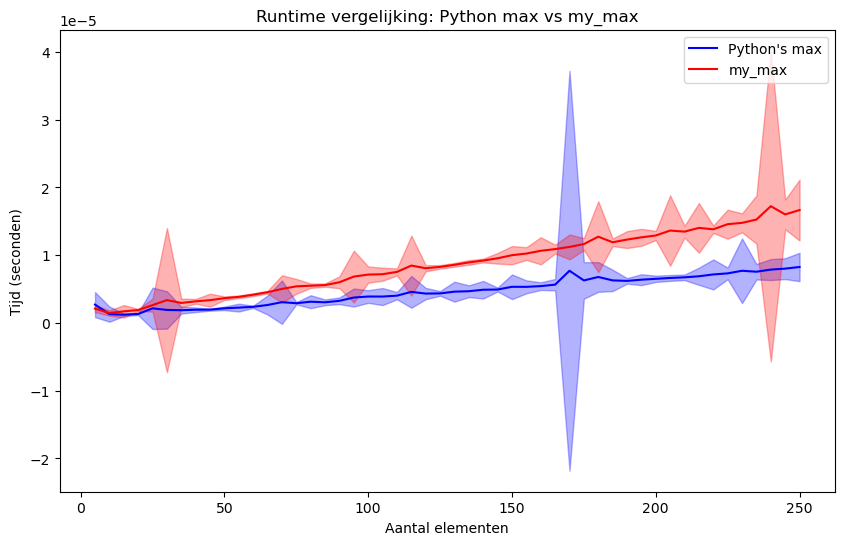


Ah, kennelijk was onze implementatie toch niet echt sneller...
Voor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.

Opmerking: Beide methoden tonen een lineaire groei (O(n)).




In [6]:
mean_std_max = []
stdev_std_max = []
mean_my_max = []
stdev_my_max = []
meetpunten = list(range(5, 251, 5))
for i in meetpunten:
    std = []
    my = []
    for _ in range(200): # 200 metingen per datapunt, probeer hier mee te experimenteren voor een beter beeld
        arr = random_int_array(i)
        t1 = time.perf_counter()
        _ = max(arr)
        t2 = time.perf_counter()
        std.append(t2 - t1)

        t1 = time.perf_counter()
        _ = my_max(arr)
        t2 = time.perf_counter()
        my.append(t2 - t1)
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))

# En dan de plot-code gemaakt met Matplotlib
# Zie bijvoorbeeld de tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
plt.figure(figsize=(10,6))
plt.plot(meetpunten, mean_std_max, "b-", label="Python's max")
plt.fill_between(meetpunten,
                 np.array(mean_std_max) - np.array(stdev_std_max),
                 np.array(mean_std_max) + np.array(stdev_std_max),
                 color="b", alpha=0.3)
plt.plot(meetpunten, mean_my_max, "r-", label="my_max")
plt.fill_between(meetpunten,
                 np.array(mean_my_max) - np.array(stdev_my_max),
                 np.array(mean_my_max) + np.array(stdev_my_max),
                 color="r", alpha=0.3)
plt.xlabel("Aantal elementen")
plt.ylabel("Tijd (seconden)")
plt.legend()
plt.title("Runtime vergelijking: Python max vs my_max")
plt.show()

print("""
Ah, kennelijk was onze implementatie toch niet echt sneller...
Voor hele kleine arrays doet hij het misschien net ietsje beter, maar zeker niet voor grotere inputs.

Opmerking: Beide methoden tonen een lineaire groei (O(n)).
""")
print("")

Wat opvalt in de plot hierboven, is dat beide implementaties (de
standaard Python max en my_max) een runtime hebben die lineair
groeit met de grootte van de input. Beide implementaties
implementeren dan ook een algoritme met een complexity van $O(n)$.
Het enige verschil is de constante voor de n, die we negeren bij
runtime analyses. Dat is ook logisch, want de standaard max en onze
my_max-implementatie zijn beide hetzelfde algoritme. Alleen maakt
de standaard max gebruik van een iterable, en is daardoor ietsje
sneller voor grotere arrays. De reden dat hij in het begin
misschien ietsje langzamer is is omdat de Python max allemaal fancy
opties heeft die eerst even moeten worden afgevangen (in constante
tijd): https://docs.python.org/3/library/functions.html#max

## Opgave 1: Dat kan slechter

*Opdracht:* Implementeer jouw eigen versie van de `max` functie, genaamd `max2`. Vergelijk de runtime van `max2` met `my_max` en `max` voor verschillende groottes van de inputarray.

Implementeer de functie max2 (Algorithm 2) uit hoofdstuk 2 van de
reader (https://canvas.hu.nl/courses/44572/files/5382884), in de
cell hieronder. Maak vervolgens een runtimevergelijkingsplot met
max1 (en my_max, zoals hierboven geïmplementeerd), op dezelfde
manier als de code hierboven.

<!-- TODO: Reader van canvas naar git halen. -->

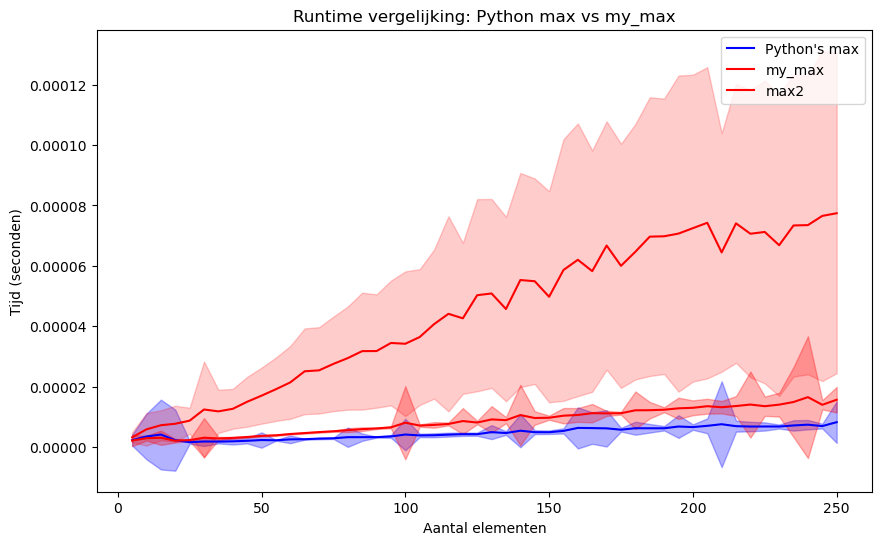

In [12]:
# Schrijf hier je eigen kwadratische implementatie van de max functie
def max2(int_array):
    for i in range(len(int_array)):
        max_found = True
        for j in range(len(int_array)):
            if int_array[j] > int_array[i]:
                max_found = False
                break  # break inner loop
        if max_found:
            return int_array[i]

# Test de functie, je mag de plotcode van hierboven hergebruiken, je zult hem wel moeten aanpassen dat er dan nu 3 lijnentjes (max, my_max, max2) in staan.
     

mean_std_max = []
stdev_std_max = []
mean_my_max = []
stdev_my_max = []
mean_max2 = []
stdev_max2 = []

meetpunten = list(range(5, 251, 5))
for i in meetpunten:
    std = []
    my = []
    m2 = []
    for _ in range(200): # 200 metingen per datapunt, probeer hier mee te experimenteren voor een beter beeld
        arr = random_int_array(i)
        t1 = time.perf_counter()
        _ = max(arr)
        t2 = time.perf_counter()
        std.append(t2 - t1)

        t1 = time.perf_counter()
        _ = my_max(arr)
        t2 = time.perf_counter()
        my.append(t2 - t1)
        
        t1 = time.perf_counter()
        _ = max2(arr)
        t2 = time.perf_counter()
        m2.append(t2 - t1)
        
    mean_std_max.append(stats.mean(std))
    stdev_std_max.append(stats.stdev(std))
    mean_my_max.append(stats.mean(my))
    stdev_my_max.append(stats.stdev(my))
    mean_max2.append(stats.mean(m2))
    stdev_max2.append(stats.stdev(m2))

# En dan de plot-code gemaakt met Matplotlib
# Zie bijvoorbeeld de tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
plt.figure(figsize=(10,6))
plt.plot(meetpunten, mean_std_max, "b-", label="Python's max")
plt.fill_between(meetpunten,
                 np.array(mean_std_max) - np.array(stdev_std_max),
                 np.array(mean_std_max) + np.array(stdev_std_max),
                 color="b", alpha=0.3)
plt.plot(meetpunten, mean_my_max, "r-", label="my_max")
plt.fill_between(meetpunten,
                 np.array(mean_my_max) - np.array(stdev_my_max),
                 np.array(mean_my_max) + np.array(stdev_my_max),
                 color="r", alpha=0.3)

plt.plot(meetpunten, mean_max2, "r-", label="max2")
plt.fill_between(meetpunten,
                 np.array(mean_max2) - np.array(stdev_max2),
                 np.array(mean_max2) + np.array(stdev_max2),
                 color="r", alpha=0.2)

plt.xlabel("Aantal elementen")
plt.ylabel("Tijd (seconden)")
plt.legend()
plt.title("Runtime vergelijking: Python max vs my_max")
plt.show()


Komt de plot overeen met je verwachting, gezien de runtime
complexity van max2? (Graag beantwoorden in text (de markdown cell)
onder je plotje.)

---

## Opgave 2: Implementatie en Analyse van de Find-functie

In Python zit een standaard find-functie, dat wil zeggen, een
functie die de index van een gegeven waarde in een lijst
teruggeeft:
https://docs.python.org/3/tutorial/datastructures.html#more-on-lists:~:text=list.index(x%5B%2C%20start%5B%2C%20end%5D%5D)
Dat is de functie **index** die hoort bij de class **list**. Deze
functie is echter niet altijd even handig. Hij doet het ten eerste
alleen op lijsten, en ten tweede, hij throwt een error als het de
waarde er niet inzit. Vaak willen we dat niet, en gewoon een -1
returnen als de waarde er niet inzit.

Nu kunnen we daar natuurlijk best een lelijke hack voor maken en toch gebruik maken van de standaardimplementatie. 

### Implementatie

In [13]:
def std_find(x, array):
    lst = list(array)
    try:
        i = lst.index(x)
    except:
        i = -1
    return i


# Test de functie
std_find(9, np.array([1, 3, 4]))

assert std_find(9, np.array([1, 3, 4])) == -1, "Nee, die zit er niet in..."
assert std_find(4, np.array([1, 3, 4])) == 2, "Nee, die zit er juist wel in..."

arr = random_int_array(20)
print("Array:", arr)
print("Index van 50 (indien aanwezig):", std_find(50, arr))
print("Index van 999 (niet aanwezig):", std_find(999, arr))

Array: [ 9 92 61 38 99 84 99 35 36 47 27 59 98 21 40 63 66 29 35 71]
Index van 50 (indien aanwezig): -1
Index van 999 (niet aanwezig): -1


Maar dat kunnen we natuurlijk ook niet doen... 

Implementeer een algoritme voor ***find***, dat de index van de éérste keer dat x in een array zit (dus de laagste index waarvoor array[index] == x) teruggeeft als x er daadwerkelijk inzit, en -1 als x er niet inzit. Je mag hierbij géén gebruik maken van standaard- en library-functies. Tip: let goed op dat je optijd returnt!

Wat is de time complexity van je algoritme (in big-O notatie)? Leg dit antwoord uit

Voer vervolgens twee testen uit, en plot daarvan de resultaten (met matplotlib, zoals hierboven gedaan voor max): 
* één test voor het vinden van een x tussen de 1 en de 99 (die er dus in kan zitten) in arrays gemaakt met functie random_int_array(i) (zoals hierboven gedefiniëerd). Variëer de lengtes van de array vanaf 5, en tot minstens 1000. Vergeet daarbij niet de meting te herhalen en zowel gemiddelde als de standaardafwijking uit te rekenen. 
* doe vervolgens nog een test volgens dezelfde meting als hierboven maar nu voor de *worst case*, in plaats van een integer tussen de 1 en de 99. Leg je beredenering uit voor wat de worst case is. 

Wat is de reden voor de verschillen die je ziet tussen de eerste en de tweede meting? 

(PS: voor degene die zich afvraagt hoe die Python-standaard en library functies eigenlijk zo snel zijn; er zit stiekem een hoop geoptimaliseerde code onder, vaak nog in C/C++ geschreven ook. Bron: https://github.com/python/cpython/blob/main/Objects/listobject.c#L3261-L3291 .  Voor een heel mooi voorbeeld hiervan kan je proberen om deze opgave nogmaals te doen gebruik makend van de library functie np.where(array==x) (ja, ik weet het, rare syntax); je slaat stijl achterover hoe snel dat is.) 

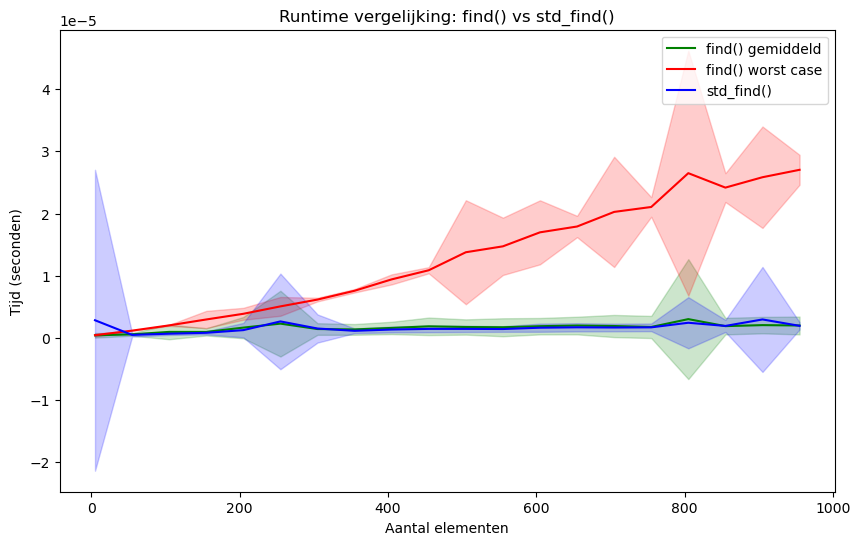

In [21]:
import random
# Opdracht 2: Zoek de index van de eerste keer dat x voorkomt in een lijst
def find(x, arr):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1
# Runtime metingen voor opdracht 2
mean_std_find = []
stdev_std_find = []
mean_worst_find = []
stdev_worst_find = []
mean_stdlib_find = []
stdev_stdlib_find = []

meetpunten = list(range(5, 1005, 50))

for i in meetpunten:
    std = []
    worst = []
    stdlib = []
    for _ in range(100):
        arr = random_int_array(i)
        x = arr[random.randint(0, len(arr)-1)]

        t1 = time.perf_counter()
        _ = find(x, arr)
        t2 = time.perf_counter()
        std.append(t2 - t1)

        t1 = time.perf_counter()
        _ = find(1000, arr)
        t2 = time.perf_counter()
        worst.append(t2 - t1)

        t1 = time.perf_counter()
        _ = std_find(x, arr)
        t2 = time.perf_counter()
        stdlib.append(t2 - t1)

    mean_std_find.append(stats.mean(std))
    stdev_std_find.append(stats.stdev(std))
    mean_worst_find.append(stats.mean(worst))
    stdev_worst_find.append(stats.stdev(worst))
    mean_stdlib_find.append(stats.mean(stdlib))
    stdev_stdlib_find.append(stats.stdev(stdlib))

plt.figure(figsize=(10,6))
plt.plot(meetpunten, mean_std_find, label="find() gemiddeld", color="green")
plt.fill_between(meetpunten,
                 np.array(mean_std_find) - np.array(stdev_std_find),
                 np.array(mean_std_find) + np.array(stdev_std_find),
                 color="green", alpha=0.2)
plt.plot(meetpunten, mean_worst_find, label="find() worst case", color="red")
plt.fill_between(meetpunten,
                 np.array(mean_worst_find) - np.array(stdev_worst_find),
                 np.array(mean_worst_find) + np.array(stdev_worst_find),
                 color="red", alpha=0.2)
plt.plot(meetpunten, mean_stdlib_find, label="std_find()", color="blue")
plt.fill_between(meetpunten,
                 np.array(mean_stdlib_find) - np.array(stdev_stdlib_find),
                 np.array(mean_stdlib_find) + np.array(stdev_stdlib_find),
                 color="blue", alpha=0.2)
plt.xlabel("Aantal elementen")
plt.ylabel("Tijd (seconden)")
plt.legend()
plt.title("Runtime vergelijking: find() vs std_find()")
plt.show()

*beantwoord hier de vragen van opgave 2*

---

## Opgave 3: Dat kan beter!

We implementeren twee versies van het Fibonacci algoritme:
- **recFibonacci:** Pure recursieve implementatie zonder memoïsatie
- **mFibonacci:** Recursieve implementatie met memoïsatie.

Daarnaast meten we zowel de runtime als het aantal functieaanroepen.

Implementeer zowel de alleen recursieve (Algorithm 6 -
recFibonacci, hoofdstuk 3 van de reader) als de recursieve met
memoïsatie versie (Algorithm 7 - mFibonacci, hoofdstuk 4 van de
reader) van het Fibonacci algoritme.

Maak een runtime-meting met verschillende inputgroottes (in dit
geval alleen de grootte van de input-integer n), en plot de
resultaten met gebruik van matplotlib. 

Doe nu nog een meting waarbij je het áántal functieaanroepen naar
de functie die de Fibonacci-reeks uitrekent (Algorithm 6 en
Algorithm 7) meet. (Oftewel, hoevaak wordt de recursie ingegaan).
Plot wederom de resultaten met matplotlib. 

Zorg voor beide plotjes voor een nette legenda en de juiste labels
op de assen. Vergeet ook niet de standaardafwijking te plotten met
een error-region (zoals hierboven). 

Wat valt je op aan de beide metingen? Komt dit overeen met je
verwachtingen met betrekking tot de runtime en het aantal function
calls gegeven de runtime complexity analyse (big-O) in de reader
(hoofdstuk 3 en 4)? 

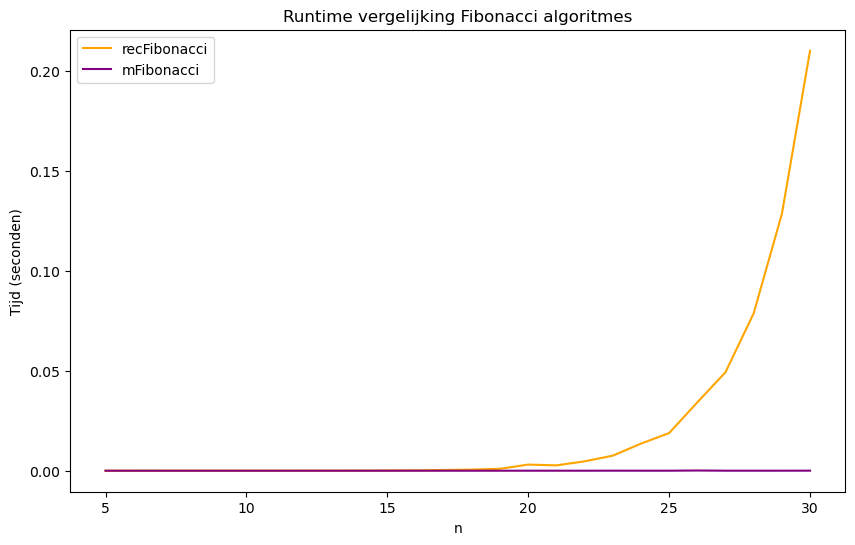

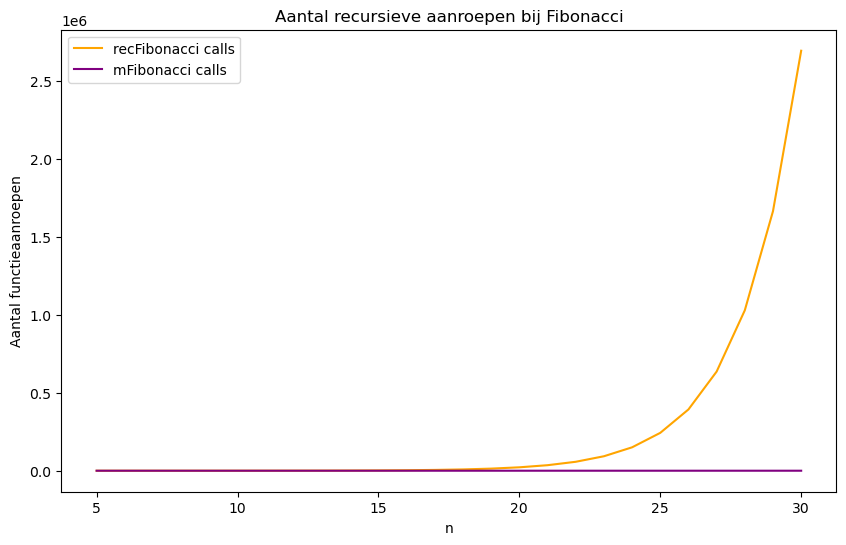

In [23]:
# Opdracht 3: recursieve Fibonacci met en zonder memoisatie
callcount_rec = 0
callcount_mem = 0

# recFibonacci (zonder memo)
def recFibonacci(n):
    global callcount_rec
    callcount_rec += 1
    if n <= 1:
        return n
    return recFibonacci(n-1) + recFibonacci(n-2)

# mFibonacci (met memo)
def mFibonacci(n, memo={}):
    global callcount_mem
    callcount_mem += 1
    if n in memo:
        return memo[n]
    if n <= 1:
        memo[n] = n
    else:
        memo[n] = mFibonacci(n-1, memo) + mFibonacci(n-2, memo)
    return memo[n]

# Runtime meting
inputs = list(range(5, 31))
rec_times = []
mem_times = []
rec_calls = []
mem_calls = []

for n in inputs:
    callcount_rec = 0
    callcount_mem = 0

    t1 = time.perf_counter()
    recFibonacci(n)
    t2 = time.perf_counter()
    rec_times.append(t2 - t1)
    rec_calls.append(callcount_rec)

    t1 = time.perf_counter()
    mFibonacci(n, memo={})
    t2 = time.perf_counter()
    mem_times.append(t2 - t1)
    mem_calls.append(callcount_mem)

# Plot runtime
plt.figure(figsize=(10,6))
plt.plot(inputs, rec_times, label="recFibonacci", color="orange")
plt.plot(inputs, mem_times, label="mFibonacci", color="purple")
plt.xlabel("n")
plt.ylabel("Tijd (seconden)")
plt.title("Runtime vergelijking Fibonacci algoritmes")
plt.legend()
plt.show()

# Plot aantal calls
plt.figure(figsize=(10,6))
plt.plot(inputs, rec_calls, label="recFibonacci calls", color="orange")
plt.plot(inputs, mem_calls, label="mFibonacci calls", color="purple")
plt.xlabel("n")
plt.ylabel("Aantal functieaanroepen")
plt.title("Aantal recursieve aanroepen bij Fibonacci")
plt.legend()
plt.show()

De recFibonacci functie zonder memoïsatie groeit exponentieel in tijd en aantal calls.

*beantwoord hier de vragen van opgave 3*

---

## Opgave 4: En dan nog een lastig beestje (waarin we **alles** doen)

Schrijf een recursieve functie in Python die uitrekent in hoeveel
unieke verschillende combinaties van munten en biljetten een bedrag
(in eurocent) betaald kan worden. Maak hierbij gebruik van de
euro-munten en biljetten. Dit zijn (in eurocenten):  1, 2, 5, 10,
20, 50, 100, 200, 500, 1000, 2000, 5000 and 10000.

Bijvoorbeeld, als wij 7 cent willen betalen zijn er 6 mogelijkheden:
* 7 = 1 + 1 + 1 + 1 + 1 + 1 + 1
* 7 = 1 + 1 + 1 + 1 + 1 + 2
* 7 = 1 + 1 + 1 + 2 + 2
* 7 = 1 + 2 + 2 + 2
* 7 = 1 + 1 + 5
* 7 = 2 + 5

Doe een runtime-complexity analyse. Welke orde van grootte heeft de runtime van de recursieve versie zonder memoïsatie? En mét? Leg je antwoord uit. 

Doe een runtime- óf een aantal-function-calls-meting, en laat het verschil zien tussen met en zonder memoïsatie in een plot (matplotlib.pyplot) als functie van de grootte van het bedrag. Vergeet niet weer meerdere metingen te doen, en de standaardafwijking mee te plotten.  

TIP1: als je bijhoudt hoeveel biljetten en munten er nog beschikbaar zijn, en je steeds de hoogste wegstreept, dan kan je voor de beschikbare biljetten een integer gebruiken als functieparameter

TIP2: voor de recursie moet je nu zowel het aantal nog beschikbare biljetten (en munten) als parameter meegeven, als het resterende bedrag; die moet je dus ook gebruiken in de memoïsatie.

TIP3: Memoïsatie kan met een array (ook een 2-dimensionale), maar je zou ook een dictionary kunnen gebruiken als lookup table. 


### Implementatie

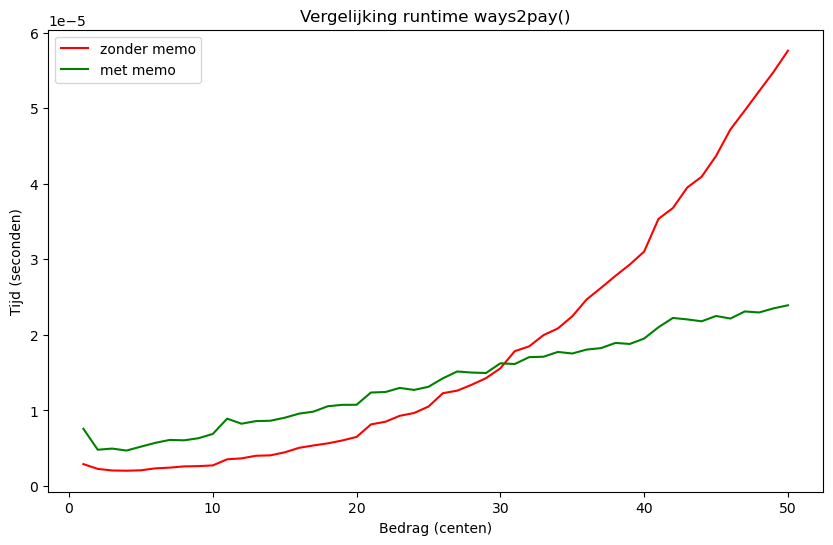

In [39]:

# opdracht 4: op hoeveel manieren kan je een bedrag maken met eurogeld?

def ways2pay(amount, highest=13, coins=[1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]):
    if amount==0:
        return 1
    elif amount<0:
        return 0
    elif highest==1:
        return 1 if amount % coins[0]==0 else 0
    return ways2pay(amount,highest-1,coins)+ways2pay(amount-coins[highest-1],highest,coins)


memo = {}
def ways2pay_memo(amount, highest=13, coins=[1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]):
    key = (amount, highest)
    if key in memo:
        return memo[key]
    if amount==0:
        return 1
    elif amount<0:
        return 0
    elif highest==1:
        return 1 if amount % coins[0]==0 else 0
    memo[key] = ways2pay_memo(amount,highest-1,coins)+ways2pay_memo(amount-coins[highest-1],highest,coins)
    return memo[key]

# testjes
assert ways2pay(5,1)==1
assert ways2pay(0,5)==1
assert ways2pay(-5,1)==0
assert ways2pay(7,13)==6

# metingen
import time
import matplotlib.pyplot as plt

bedragen = list(range(1,51))
time_plain = []
time_memo = []

for b in bedragen:
    t1 = time.perf_counter()
    ways2pay(b)
    t2 = time.perf_counter()
    time_plain.append(t2 - t1)

    memo = {}
    t1 = time.perf_counter()
    ways2pay_memo(b)
    t2 = time.perf_counter()
    time_memo.append(t2 - t1)

# plotje
plt.figure(figsize=(10,6))
plt.plot(bedragen, time_plain, label="zonder memo", color="red")
plt.plot(bedragen, time_memo, label="met memo", color="green")
plt.xlabel("Bedrag (centen)")
plt.ylabel("Tijd (seconden)")
plt.title("Vergelijking runtime ways2pay()")
plt.legend()
plt.show()

# Analyse:
# De versie zonder memoïsatie doet extreem veel herhalend werk en wordt traag bij bedragen boven de 20 cent.